# Exercise 7-4: Polynomial Regression Demo

## Step 1: Problem Analysis and Framing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm

## Step 2: Data Preparation

In [2]:
# Importing the dataset
df = pd.read_csv('../data/salaries.csv')

In [3]:
df.shape

(10, 3)

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


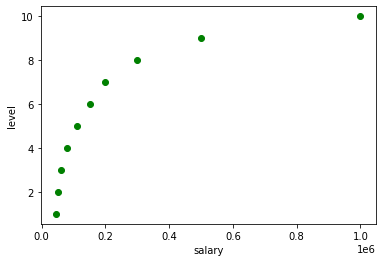

In [5]:
# plot all
plt.ylabel('level')
plt.xlabel('salary')
plt.scatter(df.Salary, df.Level, color='green')
plt.show()

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Level', ylabel='Density'>

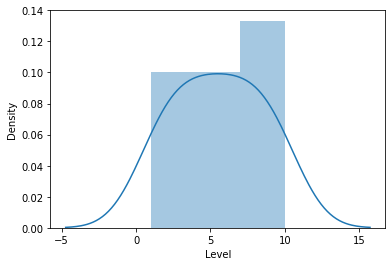

In [6]:
import seaborn as sns
# sns.histplot(df['age'],  label='age')  
sns.distplot(df['Level'],  label='level', norm_hist=True)  

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

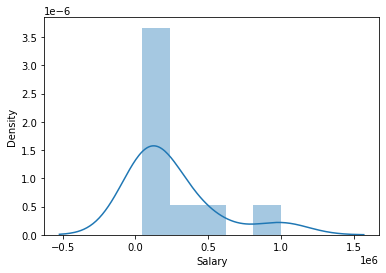

In [7]:
# sns.histplot(df['age'],  label='age')  
sns.distplot(df['Salary'],  label='salary', norm_hist=True)  

In [8]:
# check the correlation 
corr_matrix = df.corr()
corr_matrix

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


## Step 3: Train a Model

In [9]:
# split x and y
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [10]:
# Split into the training set and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression First

In [11]:
# creating Linear Regression model
linreg = LinearRegression()

# fitting the model to our data
linreg.fit(X, y)

LinearRegression()

In [12]:
y_predicted = linreg.predict(X)
y_predicted

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

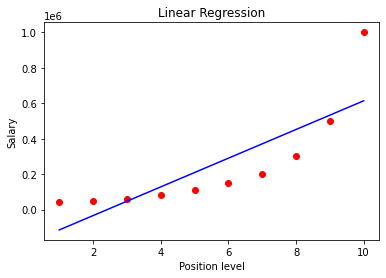

In [14]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='red')
plt.plot(X, y_predicted, color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Polynomial Regression

In [15]:
# polynomial regression model
polyreg = PolynomialFeatures(degree=4)

# transform my train data to adjust the polynom to linear regression model
X_pol = polyreg.fit_transform(X)

In [16]:
# create linear regression model
pollinreg = LinearRegression()
pollinreg.fit(X_pol, y)

LinearRegression()

In [17]:
# apply the model on my train data
y_predicted = pollinreg.predict(X_pol)

In [18]:
y_predicted

array([ 53356.64335673,  31759.90675989,  58642.19114214,  94632.86713283,
       121724.94172492, 143275.05827504, 184003.49650348, 289994.17249416,
       528694.63869465, 988916.08391617])

In [19]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

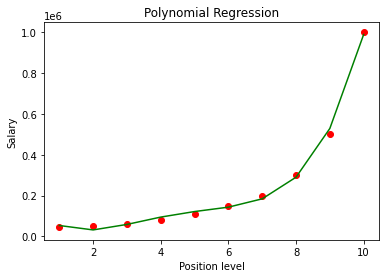

In [20]:
# Visualise the Polymonial Regression results
plt.title('Polynomial Regression')
plt.scatter(X, y, color='red')
plt.plot(X, y_predicted, color='green')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [21]:
print("Multiple Regression Performance")

# The coefficients
print('Coefficient: ', pollinreg.coef_)
print('Intercept: ', pollinreg.intercept_)

Multiple Regression Performance
Coefficient:  [      0.         -211002.33100264   94765.44289054  -15463.2867133
     890.15151515]
Intercept:  184166.66666697623


## Step 4: Test and Compare the Models

In [22]:
# Predicting a new result with Linear Regression
linreg.predict([[5.5]])
#output should be 249500

array([249500.])

In [23]:
# one more
linreg.predict([[8.0]])

array([451696.96969697])

In [24]:
# Predicting the same with Polymonial Regression
pollinreg.predict(polyreg.fit_transform([[5.5]]))
#output should be 132148.43750003


array([132148.43749998])

In [25]:
# the second test
pollinreg.predict(polyreg.fit_transform([[8]]))

array([289994.17249416])

## Step 5: Assess the Model

In [26]:
# RMSE (Root mean squared error) answers the question: "How similar, on average, are the numbers in list1 to list2?"  
rmse = np.sqrt(sm.mean_squared_error(y, y_predicted))
r2 = sm.r2_score(y, y_predicted)

In [27]:
rmse

14503.23490962701

In [28]:
r2

0.9973922891706614

Pretty good result!

## Exercise
Your turn: Applly polynomial regression to the China data.

### Reference
https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386 <br>
https://online.stat.psu.edu/stat501/lesson/9/9.8 <br>
https://github.com/justmarkham/scikit-learn-videos